In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
from sklearn.linear_model import LinearRegression 

In [2]:
iris=pd.read_csv("iris_dataset.csv")
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


In [3]:
del iris["id"]

In [4]:
iris.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,147.000000,150.000000,149.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.837808,3.052765,3.754958,1.961671,NaN
std,0.829649,0.441390,1.764346,0.730604,NaN
min,4.270281,2.025099,1.012829,0.814850,NaN
25%,5.112737,2.753251,1.551973,1.180657,NaN
50%,5.765678,3.011189,4.342197,2.038432,NaN
75%,6.411706,3.330501,5.078362,2.563017,NaN


In [5]:
iris.dropna(inplace=True)

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


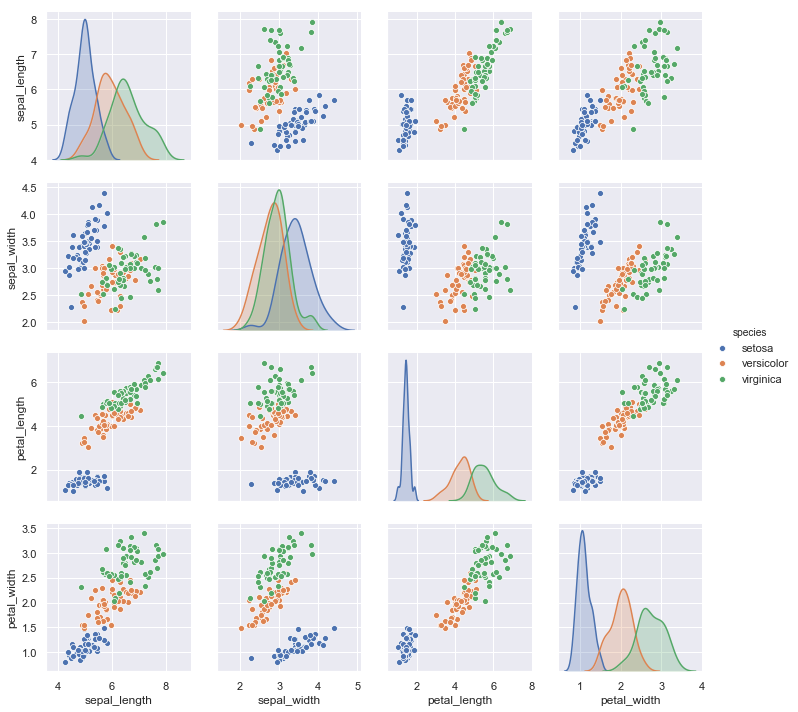

In [6]:
sns.pairplot(iris,hue="species")

In [7]:
iris_setosa=iris[iris.species=="setosa"]
iris_versicolor=iris[iris.species=="versicolor"]
iris_virginica=iris[iris.species=="virginica"]

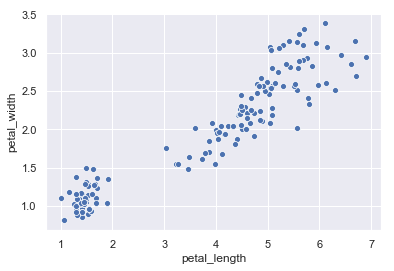

In [8]:
sns.scatterplot(iris.petal_length,iris.petal_width)

In [9]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.125099,0.871253,0.839440
sepal_width,-0.125099,1.000000,-0.440537,-0.247971
petal_length,0.871253,-0.440537,1.000000,0.941882
petal_width,0.839440,-0.247971,0.941882,1.000000


## Q1

In [10]:
corr_pw_pl=iris.corr().loc["petal_length","petal_width"]
corr_sw_pw=iris.corr().loc["sepal_width","petal_width"]
print("coefficient de corrélation linéaire de petal_width et petal_length:",corr_pw_pl)
print("coefficient de corrélation linéaire de sepal_width et petal_width:",corr_sw_pw)

coefficient de corrélation linéaire de petal_width et petal_length: 0.9418817573025173
coefficient de corrélation linéaire de sepal_width et petal_width: -0.24797130615784577


## Q2

Comme vu sur le graphique de l'énoncé petal_width et petal_length sont fortement corrélés linéairement, et positivement.
C'est à dire que plus la longueur des pétales est grandes, plus leur largeur l'est aussi.

Comme attendu d'après l'autre graphique de l'énoncé sepal_width et petal_width sont faiblement corrélé, c'est à dire qu'une
variation de l'un ne permet pas de déduire grand chose d'une variation de l'autre
ne peut pas déduire grand chose 

## Q3

In [43]:
reg_results=pd.DataFrame(index=["cas 1","cas 2","cas 3","cas 4"],columns=["a","b"])
case_dict={
    "cas 1":(iris.petal_length.values.reshape(-1,1),iris.petal_width),
    "cas 2":(iris_setosa.petal_width.values.reshape(-1,1),iris_setosa.sepal_width),
    "cas 3":(iris_virginica.petal_width.values.reshape(-1,1),iris_virginica.sepal_width),
    "cas 4":(iris_versicolor.petal_width.values.reshape(-1,1),iris_versicolor.sepal_width),
}

In [44]:
for i in range(1,5):
    cas="cas "+str(i)
    reg=LinearRegression()
    reg.fit(case_dict[cas][0],case_dict[cas][1])
    reg_results.loc[cas,"a"]=reg.coef_[0]
    reg_results.loc[cas,"b"]=reg.intercept_

In [46]:
reg_results

,a,b
cas 1,0.385994,0.509268
cas 2,1.7875,1.45933
cas 3,0.699251,1.03774
cas 4,0.97357,0.809489


In [48]:
data = pd.DataFrame([['A',1],
                     ['B',2],
                     ['C',3]], columns = ['lettre','position'])

In [50]:
data

,lettre,position
0,A,1
1,B,2
2,C,3


In [68]:
data.lettre=data.lettre.str.lower()

In [69]:
data

,lettre,position
0,a,1
1,b,2
2,c,3


In [66]:
data.lettre=[l.upper() for l in data.lettre]

In [67]:
data

,lettre,position
0,A,1
1,B,2
2,C,3
